# Importing Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import cv2 as cv
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras.applications.efficientnet import EfficientNetB4, EfficientNetB6, EfficientNetB7, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [2]:
!python --version
import sys
print(sys.executable)

Python 3.10.10
C:\Users\Admin\anaconda3\envs\caption_generator\python.exe


In [4]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
asgiref                      3.6.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
debugpy                      1.6.7
decorator                    5.1.1
Django                       4.2
django-cors-headers          3.14.0
djangorestframework          3.14.0
executing                    1.2.0
flatbuffers                  23.3.3
gast                         0.4.0
google-auth                  2.17.2
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.53.0
h5py                         3.8.0
idna                         3.4
ipdb                         0.13.13
ipykernel                    6.22.0
ipytho

# Datasets Used
Training and Testing Dataset:https://www.kaggle.com/datasets/eeshawn/flickr30k  


In [2]:
BASE_DIR = 'D:/Yugant Basnet/FYP 30K/FYP Datasets 30K'
# WORKING_DIR = 'D:/Yugant Basnet/FYP 30K/FYP Working Dir'
# WORKING_DIR = 'D:/Yugant Basnet/FYP 30K/Nepali Model Train'
WORKING_DIR = 'D:/Yugant Basnet/FYP 30K/FYP Working Dir'

# Image Feature Extraction

<b>What is it?</b>  
*   Feature extraction is a part of the dimensionality reduction process, in which, an initial set of the raw data is divided and reduced to more manageable groups.
*   Feature extraction helps to get the best feature from those big data sets by selecting and combining variables into features, thus, effectively reducing the amount of data. These features are easy to process, but still able to describe the actual data set with accuracy and originality. 


  
<b>Why is it needed?</b>  

*  The technique of extracting the features is useful when you have a large data set and need to reduce the number of resources without losing any important or relevant information. 
*   Feature extraction helps to reduce the amount of redundant data from the data set.


In [3]:
model = EfficientNetB6(weights='imagenet')
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 528, 528, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 528, 528, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 528, 528, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 528, 528, 3)  0           ['normalization[0][0]']      

 block1c_dwconv (DepthwiseConv2  (None, 264, 264, 32  288        ['block1b_add[0][0]']            
 D)                             )                                                                 
                                                                                                  
 block1c_bn (BatchNormalization  (None, 264, 264, 32  128        ['block1c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block1c_activation (Activation  (None, 264, 264, 32  0          ['block1c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 32)          0           ['block1c_activation[0][0]']     
 agePoolin

                                                                                                  
 block2b_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2b_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2b_activation (Activation  (None, 132, 132, 24  0          ['block2b_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2b_se_squeeze (GlobalAver  (None, 240)         0           ['block2b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2b_s

 D)                             0)                               ']                               
                                                                                                  
 block2d_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2d_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2d_activation (Activation  (None, 132, 132, 24  0          ['block2d_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2d_se_squeeze (GlobalAver  (None, 240)         0           ['block2d_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block2f_dwconv (DepthwiseConv2  (None, 132, 132, 24  2160       ['block2f_expand_activation[0][0]
 D)                             0)                               ']                               
                                                                                                  
 block2f_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2f_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2f_activation (Activation  (None, 132, 132, 24  0          ['block2f_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2f_se_squeeze (GlobalAver  (None, 240)         0           ['block2f_activation[0][0]']     
 agePoolin

 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 66, 66, 432)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 432)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 432)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_s

 block3d_se_squeeze (GlobalAver  (None, 432)         0           ['block3d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3d_se_reshape (Reshape)   (None, 1, 1, 432)    0           ['block3d_se_squeeze[0][0]']     
                                                                                                  
 block3d_se_reduce (Conv2D)     (None, 1, 1, 18)     7794        ['block3d_se_reshape[0][0]']     
                                                                                                  
 block3d_se_expand (Conv2D)     (None, 1, 1, 432)    8208        ['block3d_se_reduce[0][0]']      
                                                                                                  
 block3d_se_excite (Multiply)   (None, 66, 66, 432)  0           ['block3d_activation[0][0]',     
          

 block3f_se_reduce (Conv2D)     (None, 1, 1, 18)     7794        ['block3f_se_reshape[0][0]']     
                                                                                                  
 block3f_se_expand (Conv2D)     (None, 1, 1, 432)    8208        ['block3f_se_reduce[0][0]']      
                                                                                                  
 block3f_se_excite (Multiply)   (None, 66, 66, 432)  0           ['block3f_activation[0][0]',     
                                                                  'block3f_se_expand[0][0]']      
                                                                                                  
 block3f_project_conv (Conv2D)  (None, 66, 66, 72)   31104       ['block3f_se_excite[0][0]']      
                                                                                                  
 block3f_project_bn (BatchNorma  (None, 66, 66, 72)  288         ['block3f_project_conv[0][0]']   
 lization)

 block4b_project_conv (Conv2D)  (None, 33, 33, 144)  124416      ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 33, 33, 144)  576        ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (Dropout)         (None, 33, 33, 144)  0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 33, 33, 144)  0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_e

 block4d_drop (Dropout)         (None, 33, 33, 144)  0           ['block4d_project_bn[0][0]']     
                                                                                                  
 block4d_add (Add)              (None, 33, 33, 144)  0           ['block4d_drop[0][0]',           
                                                                  'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, 33, 33, 864)  124416      ['block4d_add[0][0]']            
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 33, 33, 864)  3456       ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4e_e

 block4g_expand_conv (Conv2D)   (None, 33, 33, 864)  124416      ['block4f_add[0][0]']            
                                                                                                  
 block4g_expand_bn (BatchNormal  (None, 33, 33, 864)  3456       ['block4g_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4g_expand_activation (Act  (None, 33, 33, 864)  0          ['block4g_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4g_dwconv (DepthwiseConv2  (None, 33, 33, 864)  7776       ['block4g_expand_activation[0][0]
 D)                                                              ']                               
          

 block5a_expand_activation (Act  (None, 33, 33, 864)  0          ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv (DepthwiseConv2  (None, 33, 33, 864)  21600      ['block5a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5a_bn (BatchNormalization  (None, 33, 33, 864)  3456       ['block5a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5a_activation (Activation  (None, 33, 33, 864)  0          ['block5a_bn[0][0]']             
 )        

                                                                                                  
 block5c_activation (Activation  (None, 33, 33, 1200  0          ['block5c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 1200)        0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5c_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block5c_se_squeeze[0][0]']     
                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 50)     60050       ['block5c_se_reshape[0][0]']     
          

                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 1200)        0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 50)     60050       ['block5e_se_reshape[0][0]']     
                                                                                                  
 block5e_se_expand (Conv2D)     (None, 1, 1, 1200)   61200       ['block5e_se_reduce[0][0]']      
                                                                                                  
 block5e_s

                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_se_reduce (Conv2D)     (None, 1, 1, 50)     60050       ['block5g_se_reshape[0][0]']     
                                                                                                  
 block5g_se_expand (Conv2D)     (None, 1, 1, 1200)   61200       ['block5g_se_reduce[0][0]']      
                                                                                                  
 block5g_se_excite (Multiply)   (None, 33, 33, 1200  0           ['block5g_activation[0][0]',     
                                )                                 'block5g_se_expand[0][0]']      
                                                                                                  
 block5g_p

                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 50)     60050       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 1200)   61200       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_se_excite (Multiply)   (None, 17, 17, 1200  0           ['block6a_activation[0][0]',     
                                )                                 'block6a_se_expand[0][0]']      
                                                                                                  
 block6a_p

                                )                                 'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 17, 17, 344)  710016      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 17, 17, 344)  1376       ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_drop (Dropout)         (None, 17, 17, 344)  0           ['block6c_project_bn[0][0]']     
                                                                                                  
 block6c_add (Add)              (None, 17, 17, 344)  0           ['block6c_drop[0][0]',           
          

                                                                                                  
 block6e_project_bn (BatchNorma  (None, 17, 17, 344)  1376       ['block6e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6e_drop (Dropout)         (None, 17, 17, 344)  0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 17, 17, 344)  0           ['block6e_drop[0][0]',           
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_expand_conv (Conv2D)   (None, 17, 17, 2064  710016      ['block6e_add[0][0]']            
          

                                                                                                  
 block6g_drop (Dropout)         (None, 17, 17, 344)  0           ['block6g_project_bn[0][0]']     
                                                                                                  
 block6g_add (Add)              (None, 17, 17, 344)  0           ['block6g_drop[0][0]',           
                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 17, 17, 2064  710016      ['block6g_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6h_expand_bn (BatchNormal  (None, 17, 17, 2064  8256       ['block6h_expand_conv[0][0]']    
 ization) 

 block6i_add (Add)              (None, 17, 17, 344)  0           ['block6i_drop[0][0]',           
                                                                  'block6h_add[0][0]']            
                                                                                                  
 block6j_expand_conv (Conv2D)   (None, 17, 17, 2064  710016      ['block6i_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6j_expand_bn (BatchNormal  (None, 17, 17, 2064  8256       ['block6j_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6j_expand_activation (Act  (None, 17, 17, 2064  0          ['block6j_expand_bn[0][0]']      
 ivation) 

 block7a_expand_conv (Conv2D)   (None, 17, 17, 2064  710016      ['block6k_add[0][0]']            
                                )                                                                 
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 17, 17, 2064  8256       ['block7a_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block7a_expand_activation (Act  (None, 17, 17, 2064  0          ['block7a_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 17, 17, 2064  18576      ['block7a_expand_activation[0][0]
 D)       

                                                                                                  
 block7c_dwconv (DepthwiseConv2  (None, 17, 17, 3456  31104      ['block7c_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block7c_bn (BatchNormalization  (None, 17, 17, 3456  13824      ['block7c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block7c_activation (Activation  (None, 17, 17, 3456  0          ['block7c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block7c_s

### Architecture


*   EfficientNet is a mobile friendly pure convolutional model (ConvNet) that proposes a new scaling method that uniformly scales all dimensions of depth/width/resolution using a simple yet highly effective compound coefficient. 



![](https://www.researchgate.net/publication/359923805/figure/fig5/AS:1186990259208199@1660011939627/Modified-EfficientNetB4-architecture-as-encoder.png)

In [18]:
features = {}
directory = os.path.join(BASE_DIR, 'flickr30k_images')

for img_name in tqdm(os.listdir(directory)):
    
    # Create a complete Image Path (Absolute Path)
    img_path = directory + '/' + img_name
    
    # Load the image and resize to 380, 380 for preprocessing
    img = load_img(img_path, target_size = (528, 528))
    
    # Convert image to array
    img = img_to_array(img)
    
    # Batch-size, height, width, number of channels
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    
    # Preprocess before sending to efficientnet to generate feature maps
    img = preprocess_input(img)
    
    # Generate feature map per image basis
    feature = model.predict(img, verbose = 0)
    
    # Split name since schema = Name.jpg or Name.pg extract only the 'Name'
    image_id = img_name.split('.')[0]
    
    # Dictionary that has the complete feature of the train data
    features[image_id] = feature

100%|█████████████████████████████████████████████████████████████████████████| 31783/31783 [17:12:11<00:00,  1.95s/it]


In [19]:
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features30k_effnet6.pkl'), 'wb'))

#### Storing extracted features

#### Loading the stored features

In [4]:
with open(os.path.join(WORKING_DIR, 'features30k_effnet6.pkl'), 'rb') as f: # Replace this with features30K_effnet6.pkl
    features = pickle.load(f)

In [5]:
features.get('1000092795')

array([[ 0.09241223, -0.01989166,  0.09043457, ...,  0.05664729,
         0.2872066 , -0.08809069]], dtype=float32)

# Working with Captions

In [22]:
# with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
#     next(f)
#     captions_text = f.read()

with open(os.path.join(BASE_DIR, 'flickr30k_translated_nepali_captions.txt'), 'r', encoding='utf-8') as f:
    next(f)
    captions_text = f.read()

In [23]:
mapper = {"img_id": [], "caption": []}

# Caption per line: 1000092795.jpg,0,Two young guys with shaggy hair look at their hands while hanging out in the yard .
for _ in captions_text.split("\n"):
    if len(_) >= 2:
        
        # ['1000092795.jpg', [0], [Two young guys with shaggy hair look at their hands while hanging out in the yard .]
        # img_id = (1000092795.jpg).split('.')[0] = '1000092795'
        
        img_id = _.split(",")[0].split('.')[0]
        
        # img_id.append('1000092795')
        mapper["img_id"].append(img_id)
        
        # Join from [0], [Two young guys with shaggy hair look at their hands while hanging out in the yard .] and add 1 
        # space between the two so as to get the caption
        current_caption = " ".join(_.split(",")[1:])
        
        # Append Catpion in Caption List of dict mapper
        mapper["caption"].append(current_caption)
        
# Create a Dictionary from the mapper
captions_df = pd.DataFrame(mapper)
captions_df.head()

img_id caption
0  1000092795        
1  1000092795        
2  1000092795        
3  1000092795        
4  1000092795

In [24]:
mapper = {"img_id": [], "caption": []}
for _ in captions_text.split("\n"):
    if len(_) >= 2:
        current_cap_list = _.split("#")
        current_img_id = current_cap_list[0].split(".")[0]
        
        mapper["img_id"].append(current_img_id)
        
        mapper["caption"].append(current_cap_list[1])
    
# Create a Dictionary from the mapper
captions_df = pd.DataFrame(mapper)
captions_df.head()

img_id                                            caption
0  1000092795  0 बाक्लो कपाल भएका दुई जवान केटाहरू आँगनमा झुन...
1  1000092795  1 दुई जवान गोरा केटाहरू बाहिर धेरै झाडीहरू नजि...
2  1000092795  2 हरियो शर्ट लगाएका दुई जना मानिस आँगनमा उभिरह...
3  1000092795         3 बगैंचामा उभिएको नीलो शर्ट लगाएको मान्छे।
4  1000092795    4 दुई साथीहरू सँगै बिताएको समयको आनन्द लिन्छन्।

### Preprocessing captions


*   Convert sentences into lowercase
*   Remove special characters and numbers present in the text
*   Remove extra spaces
*   Remove single characters
*   Add a starting and an ending tag to the sentences to indicate the beginning and the ending of a sentence











### Cleaning the captions

In [49]:
print("Before Cleaning")
print(captions_df[captions_df["img_id"] == "1000092795"]["caption"][0])

Before Cleaning
0 बाक्लो कपाल भएका दुई जवान केटाहरू आँगनमा झुन्डिएको बेला आफ्ना हातहरू हेर्छन्।


In [50]:
# Lowercases the Captions
captions_df["caption"] = captions_df["caption"].apply(lambda caption: caption.lower())

# Removes consecutive whitespace characters
captions_df["caption"] = captions_df["caption"].apply(lambda caption: caption.replace("\s+", " "), )

# Only retains lowercase a to z or uppercase A to z (could be '^w' <- Proper Syntax)
captions_df["caption"] = captions_df["caption"].apply(lambda caption: caption.replace("[^A-Za-z]", " "))

# Filter unnecessary characters
captions_df["caption"] = captions_df["caption"].apply(lambda caption: " ".join([_ for _ in caption.split() if len(_) > 1]))

# Apply start and end token to each caption (for training purpose)
captions_df["caption"] = captions_df["caption"].apply(lambda caption: "startseq " + caption + " endseq")

In [73]:
print("After Cleaning")
print(captions_df[captions_df["img_id"] == "1000092795"]["caption"][1])

After Cleaning
startseq दुई जवान गोरा केटाहरू बाहिर धेरै झाडीहरू नजिक छन्। endseq


['0 बाक्लो कपाल भएका दुई जवान केटाहरू आँगनमा झुन्डिएको बेला आफ्ना हातहरू हेर्छन्।', '1 दुई जवान गोरा केटाहरू बाहिर धेरै झाडीहरू नजिक छन्।', '2 हरियो शर्ट लगाएका दुई जना मानिस आँगनमा उभिरहेका छन्।', '3 बगैंचामा उभिएको नीलो शर्ट लगाएको मान्छे।', '4 दुई साथीहरू सँगै बिताएको समयको आनन्द लिन्छन्।']
['0 कडा टोपी लगाएका धेरै पुरुषहरूले विशाल पुली प्रणाली सञ्चालन गरिरहेका छन्।', '1 कामदारहरूले उपकरणको टुक्रामा माथिबाट तल हेर्छन्।', '2 कडा टोपी लगाएर मेसिनमा काम गर्दै दुई जना पुरुष।', '3 अग्लो संरचनाको शीर्षमा चार जना पुरुष।', '4 ठूलो रिगमा तीन जना पुरुष।']
['0 गुलाबी लुगा लगाएको बच्चा प्रवेश गर्ने बाटोमा सीढीको सेट चढ्दै छ।', '1 गुलाबी पोशाकमा एउटी केटी काठको केबिनमा जाँदै।', '2 एउटी सानी केटी आफ्नो खेलघरमा सिँढी चढ्दै।', '3 काठको प्लेहाउसमा चढ्दै एउटी सानी केटी', '4 काठको भवनमा जाँदै केटी।']
['0 नीलो शर्ट र टोपी लगाएको कोही सीढीमा उभिएको छ र झ्यालमा झुकेको छ।', '1 नीलो शर्ट लगाएको एक मानिस सीढीमा उभिएर झ्याल सफा गर्दै छ।', '2 सिँढीमा एक जना मानिसले अग्लो भवनको झ्याल सफा गर्दैछ।', '3 नीलो शर्ट

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


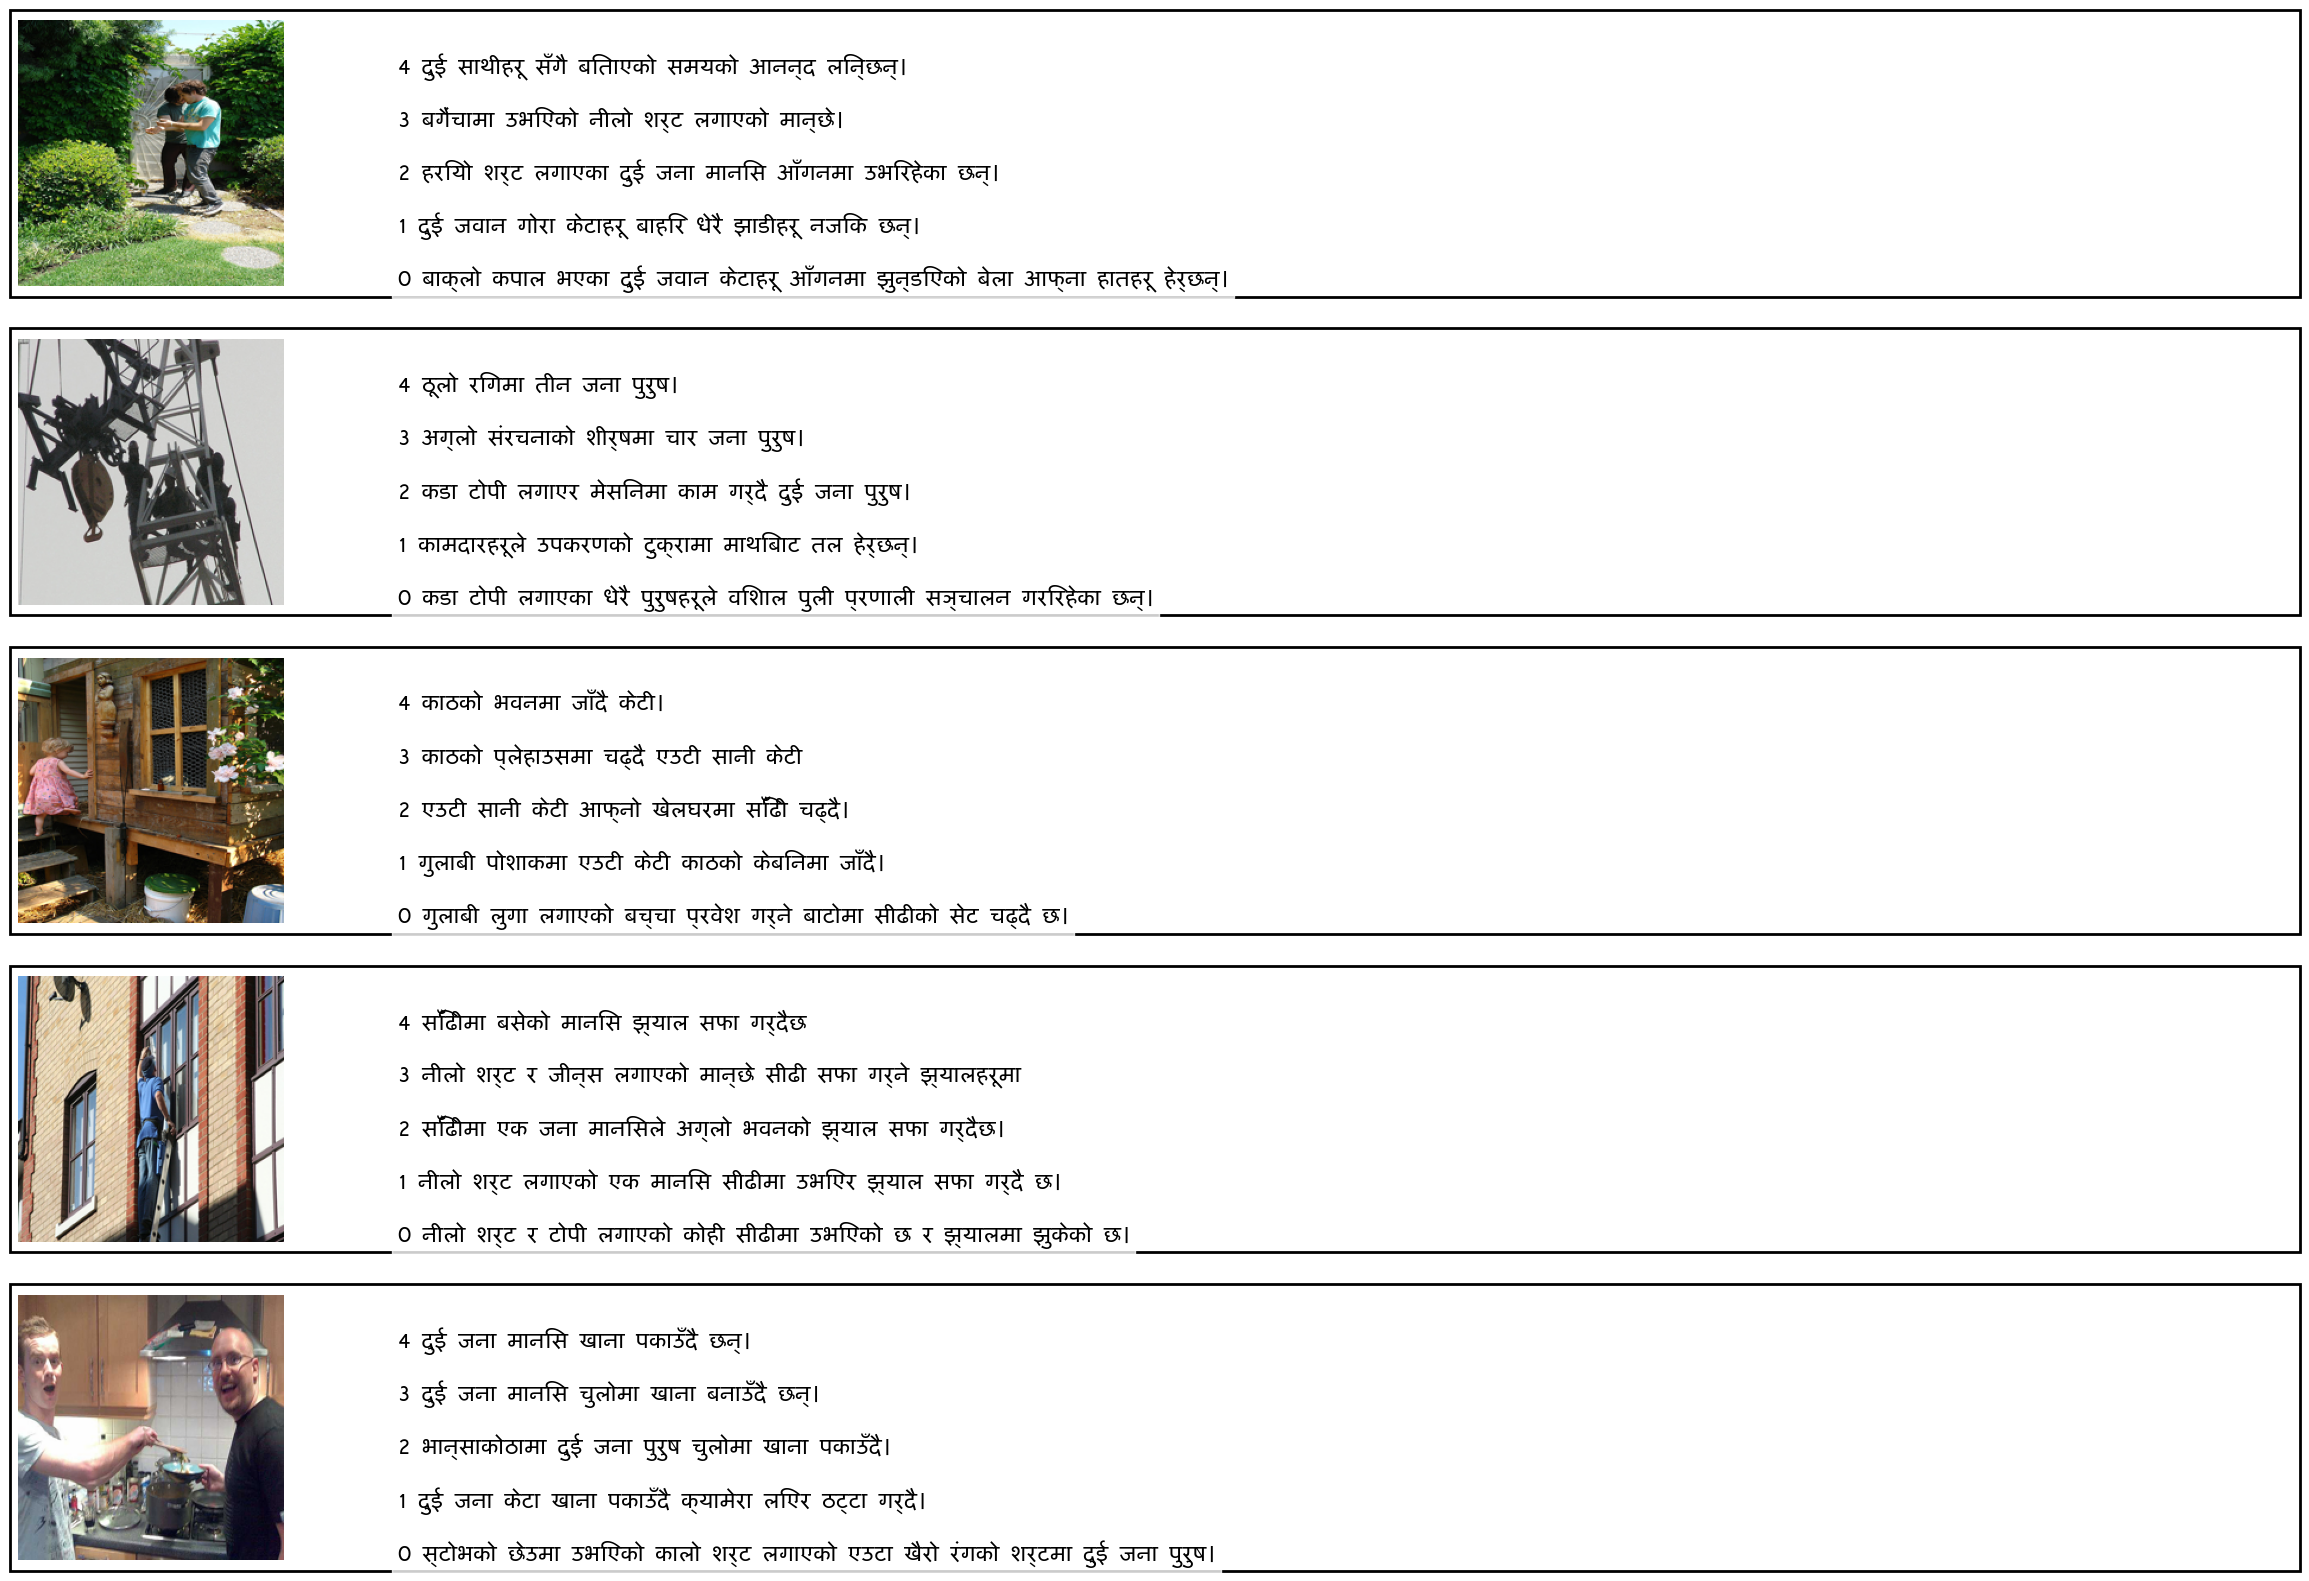

In [25]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd
import matplotlib.font_manager as fm

path = 'D:/Yugant Basnet/FYP 30K/FYP Datasets 30K/flickr30k_images/'

# List all the files in path (train path)
imgs = os.listdir(path)

c = 1 # Counter to Keep track
n = 5 # Total number of images to be shown in the plot

# Set font family to Nepali font
font_path = 'D:/Yugant Basnet/FYP 30K/Nepali Font/Mangal Regular/Mangal Regular.otf'
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

# Figure object with a size of 10 by 20
figure = plt.figure(figsize=(10,20))

# Iterate over 5 times in the directory
for i in range(n):
    
    # Iterate one image at a time
    file = path + imgs[i]
    
    # Select caption from caption df for the corresponding image
    captions = list(captions_df[captions_df["img_id"] == imgs[i].split(".")[0]]["caption"])
    print(captions)
    
    # Loads the current image for iteration i with target size as 224, 224 with 3 color channels
    image = Image.open(file).resize((224, 224))
    
    # Current subplot object
    ax = figure.add_subplot(n, 2, c)
    plt.axis("off")
    
    # Plot the image
    ax.imshow(image)
    
    # Increment counter
    c += 1
    ax = figure.add_subplot(n, 2, c)
    
    # Limits for x plot
    ax.set_xlim(0, 1)
    
    # Limits for y plot
    ax.set_ylim(0, len(captions))
    
    # Plot 1 caption at a time from the list of captions for current image
    for i, caption in enumerate(captions):
        ax.text(0, i, caption, fontsize=16, fontproperties=prop, 
                bbox=dict(facecolor='white', edgecolor='white', alpha=0.8, pad=4))
    plt.axis("off")
    c += 1
    
    drawRect = ax.axis()
    rec = plt.Rectangle((drawRect[0] - 1.1, drawRect[2] - 0.2),(drawRect[1] - drawRect[0]) + 5.5, 
                        (drawRect[3] - drawRect[2]) + 0.4, fill = False, lw = 2)
    rec = ax.add_patch(rec)
    rec.set_clip_on(False)

plt.show()

In [80]:
# Total image is 31,783 (Each image has 5 captions) so the size of corpus is 31,783 times 5 = 158,915 Captions
all_captions = captions_df["caption"].tolist()
print("Size of the corpus:", len(all_captions), "captions.")

Size of the corpus: 157840 captions.


In [81]:
# For each caption check the one with the most letters
# Split each caption (get list of words) len it and see which one has highest (74 in this case)
max_length = max(len(caption.split()) for caption in all_captions)
print("Maximum length word in the corpus:", max_length)

Maximum length word in the corpus: 58


# Natural Language Processing




*   Natural Language Processing (NLP) is a subfield of artificial intelligence (AI). It helps machines process and understand the human language so that they can automatically perform repetitive tasks.
*   In natural language processing, human language is separated into fragments so that the grammatical structure of sentences and the meaning of words can be analyzed and understood in context. This helps computers read and understand spoken or written text in the same way as humans.  



<b>tokenizer</b> = Tokenizer() creates a new instance of the Tokenizer class, which is a Keras utility for vectorizing text data.<br>
<b>tokenizer.fit_on_texts(all_captions)</b> fits the tokenizer on a list of text captions, which processes the text data and generates a vocabulary of unique words. The input to this method should be a list of strings, where each string represents a text caption.<br>
<b>vocab_size = len(tokenizer.word_index) + 1</b> computes the size of the vocabulary, which is the total number of unique words in all the captions. <br>The tokenizer.word_index attribute is a dictionary that maps each unique word to an integer index, and the length of this dictionary corresponds to the number of unique words. The +1 is added to account for the special <PAD> token that will be added later, which is not included in the word index.

In [82]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(all_captions)
# vocab_size = len(tokenizer.word_index) + 1
# vocab_size

38234

In [83]:
# print(vocab_size)

38234


In [84]:
# # Dump the tokenizer to a file
# with open(WORKING_DIR + '/' + 'tokenizer.pkl', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# Load the tokenizer from the file
with open(WORKING_DIR + '/' + 'tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)
    
print(tokenizer)
vocab_size = len(tokenizer.word_index) + 1

## Data Generation



*   Creating data generator to get data in batch
*   Generally the larger the batch size, the quicker our model will complete each epoch during training. This is because, depending on our computational resources, our machine may be able to process much more than one single sample at a time.



In [7]:
# Train model on the fly!

def data_generator(data_keys, mapper, features, tokenizer, max_length, vocab_size, batch_size):
    
    # Initialize 3 Lists
    X1, X2, y = list(), list(), list()
    
    # Initialize Number of Samples
    n = 0
    
    # Indefinite Loop
    while 1:
        
        # Iterate over keys in dictionary
        for key in data_keys:
            
            # Increment sample by 1
            n += 1
            
            # Caption for key (image name) 
            captions = mapper[key]
            
            # Caption in captions (5 caption per image)
            for caption in captions:
                
                # Tokenize current caption
                seq = tokenizer.texts_to_sequences([caption])[0]
                
                # Iterate over the tokenized caption
                for i in range(1, len(seq)):
                    
                    # For any given set of words from start to i predict out
                    in_seq, out_seq = seq[:i], seq[i]
                    
                    # pad_senquences to max length = 74 (in this case)
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    
                    # One hot encode output senquence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    
                    # Append feature for image name
                    X1.append(features[key][0])
                    
                    # Append input sequence through above method
                    X2.append(in_seq)
                    
                    # Append output sequence
                    y.append(out_seq)
                    
            if n == batch_size:
                # Create arrays from feature-map, input sequence and output sequence
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                
                # reset all params 
                X1, X2, y = list(), list(), list()
                n = 0

### Train/Test split

Splitting the dataset to training and testing data in 90:10 ration respectively.

In [87]:
# cleaned_caption_map = {}

# # Iterate over image_id
# for i in tqdm(np.unique(captions_df["img_id"])):
    
#     # Update dictionary list captions to image, image as keys captions as values
#     cleaned_caption_map[i] = list(captions_df[captions_df["img_id"] == i]["caption"])

100%|███████████████████████████████████████████████████████████████████████████| 31568/31568 [04:00<00:00, 131.29it/s]


In [88]:
# # Dump the cleaned_caption_map to a file
# with open(WORKING_DIR + '/' + 'cleaned_caption_map.pkl', 'wb') as handle:
#     pickle.dump(cleaned_caption_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

# len(cleaned_caption_map)

31568

In [8]:
# Load the cleaned_caption_map from the file
with open(WORKING_DIR + '/' + 'cleaned_caption_map.pkl', 'rb') as handle:
    cleaned_caption_map = pickle.load(handle)
    
len(cleaned_caption_map)

31783

In [9]:
# List Image Ids
image_ids = list(cleaned_caption_map.keys())

# 90% split
split = int(len(image_ids) * 0.90)

# Training from start to split value (90%)
train = image_ids[:split]

# Testing from split to end value (10%)
test = image_ids[split:]

print('Training Len:', len(train))
print('Testing Len:', len(test))

total_data = len(train) + len(test)
print('\nTotal Data:', total_data)

Training Len: 28604
Testing Len: 3179

Total Data: 31783


# Caption Generation Model

## LSTM: Long Short Term Memory  


*   Long Short Term Memory is a kind of recurrent neural network. In RNN output from the last step is fed as input in the current step.
*   Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) that is specifically designed to handle sequential data, such as time series, speech, and text.
*   LSTM networks are capable of learning long-term dependencies in sequential data, which makes them well suited for tasks such as language translation, speech recognition, and time series forecasting.

## Encoder Layer

In [160]:
# # EfficientNetB4 shape output
# inputs1 = Input(shape=(1792 ,))

# # Dropout neurons randomly 40% duing training
# fe1 = Dropout(0.4)(inputs1)

# # Fully connected layer 512 was found to be best no overfitting or under
# fe2 = Dense(512, activation='relu')(fe1)
# fe3= Dense(256, activation='relu')(fe2)

In [161]:
# # For caption max_length = 74
# inputs2 = Input(shape=(max_length,))

# # creating embedding matrix of 256 length
# se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)

# # Dropout of 40% rate
# se2 = Dropout(0.4)(se1)

# se3 = LSTM(256)(se2)

In [162]:
# print('Inputs Shape:', inputs1.shape)
# print('Dropout Layer:', fe1.shape)
# print('Dense Layer (512):', fe2.shape)
# print('Dense Layer (256):', fe3.shape)
# print('\nInputs Shape 2:', inputs2.shape)
# print('Embedding Layer:', se1.shape)
# print('Dropout Layer:', se2.shape)
# print('LSTM (256):', se3.shape)

Inputs Shape: (None, 1792)
Dropout Layer: (None, 1792)
Dense Layer (512): (None, 512)
Dense Layer (256): (None, 256)

Inputs Shape 2: (None, 74)
Embedding Layer: (None, 74, 256)
Dropout Layer: (None, 74, 256)
LSTM (256): (None, 256)


## Decoder Layer

In [163]:
# # Feature encoder and sequence encoder and added
# decoder1 = add([fe3, se3])

# # Fully connected layer from decoder1 amalgamation of feature and text sequence information
# decoder2 = Dense(256, activation='relu')(decoder1)

# # Output of word which reduces cross entropy loss between each words in the max length
# outputs = Dense(vocab_size, activation='softmax')(decoder2)

## Model Compilation

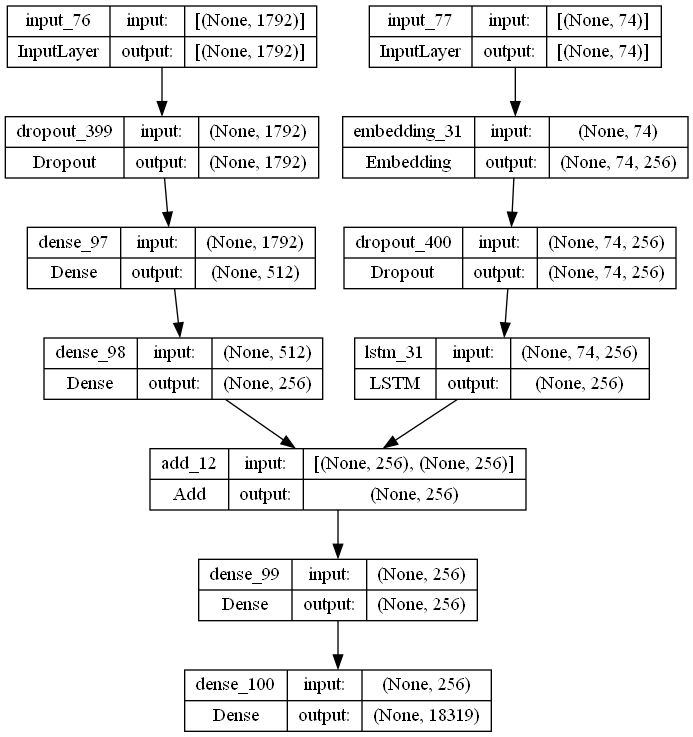

In [164]:
# model = Model(inputs=[inputs1, inputs2], outputs=outputs)
# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# plot_model(model, show_shapes=True)

18319
74


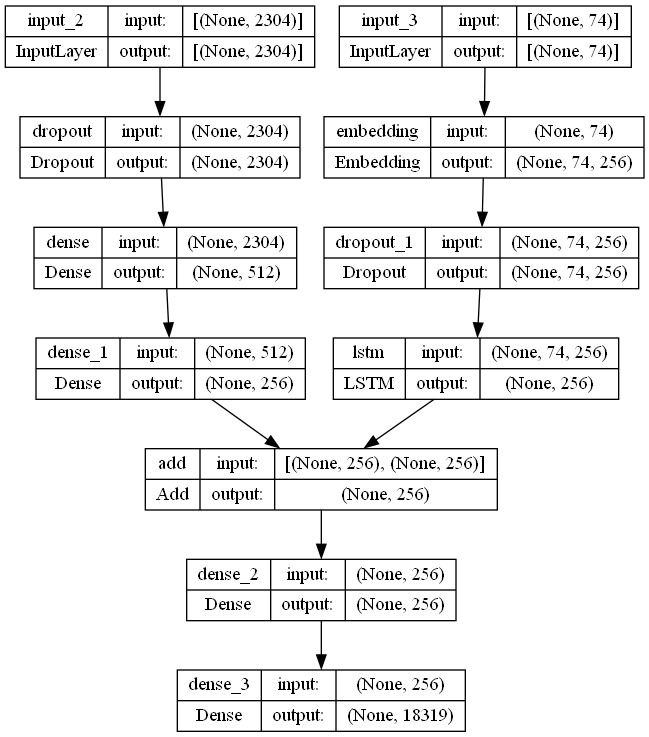

In [10]:
max_length = 74
# EfficientNetB4 shape output
inputs1 = Input(shape=(2304 ,)) # INPUTS 1 is the input layer for EfficientNetB4

# Dropout neurons randomly 40% duing training
fe1 = Dropout(0.4)(inputs1) # 2nd layer drops out input layers by 40%

# Fully connected layer 512 was found to be best no overfitting or under
fe2 = Dense(512, activation='relu')(fe1) # Fully connected layer to fe3
fe3= Dense(256, activation='relu')(fe2)

# For caption max_length = 74
inputs2 = Input(shape=(max_length,)) # Layer for Caption

# creating embedding matrix of 256 length
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2) # Fully connected layer

# Dropout of 40% rate
se2 = Dropout(0.4)(se1) # Dropout of 40% for that layer

se3 = LSTM(256)(se2) # Fully connected layer connected to the above dropout

# Feature encoder and sequence encoder and added
decoder1 = add([fe3, se3]) 

# Fully connected layer from decoder1 amalgamation of feature and text sequence information
decoder2 = Dense(256, activation='relu')(decoder1)

# Output of word which reduces cross entropy loss between each words in the max length
outputs = Dense(vocab_size, activation='softmax')(decoder2)
print(vocab_size)
print(max_length)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
plot_model(model, show_shapes=True)

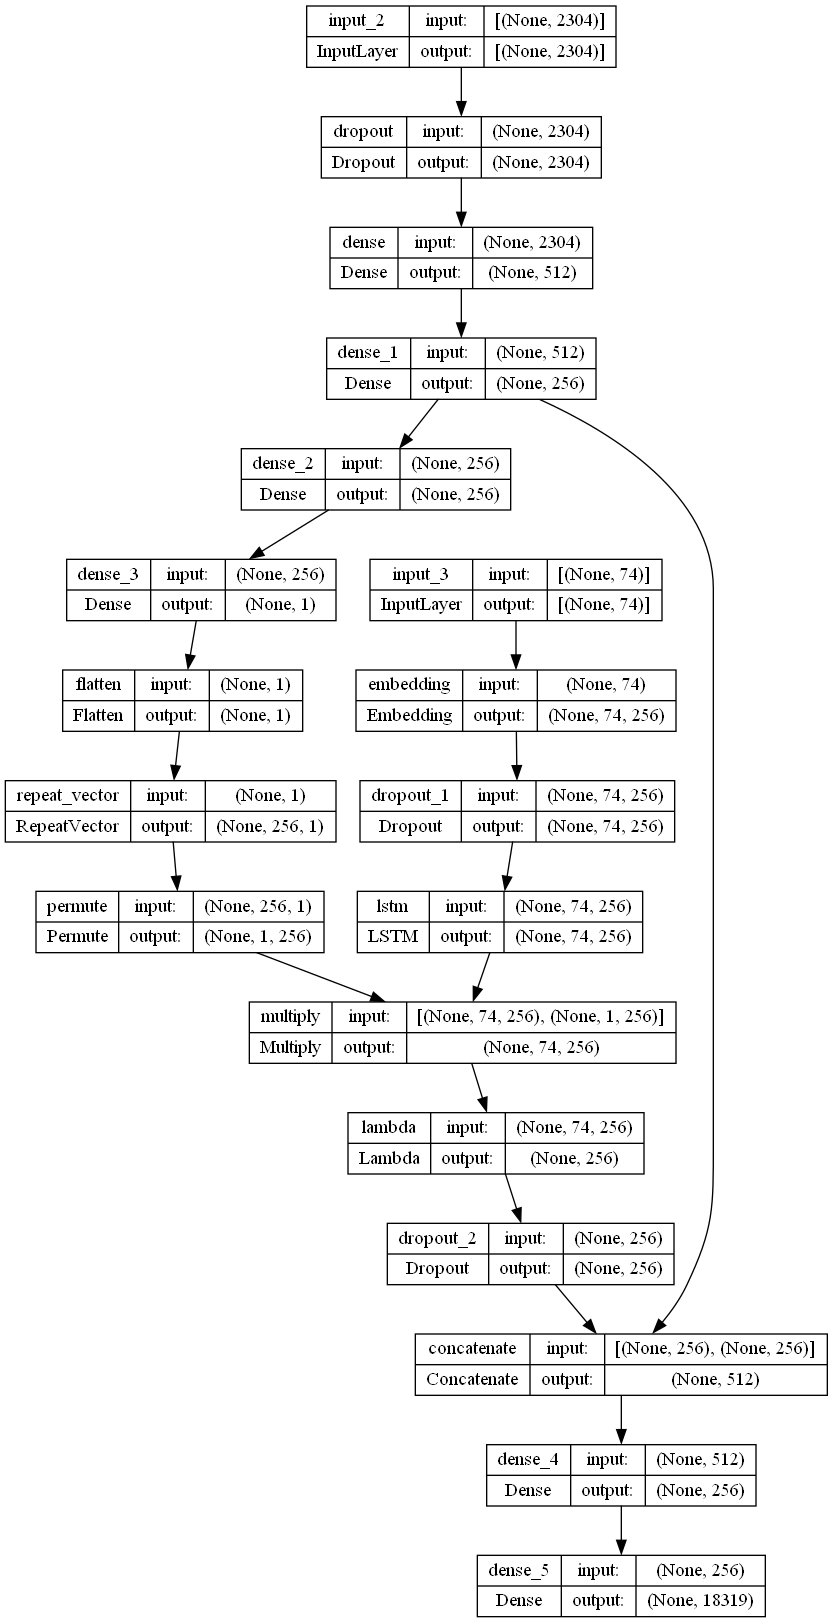

In [14]:
# from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, concatenate, Dot
# from keras.layers import multiply, Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import plot_model
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# from keras import backend as K
# from keras.layers import RepeatVector, Permute
# from keras.layers import Lambda

# # EfficientNetB4 shape output
# inputs1 = Input(shape=(2304 ,)) # INPUTS 1 is the input layer for EfficientNetB4

# # Dropout neurons randomly 40% during training
# fe1 = Dropout(0.2)(inputs1) # 2nd layer drops out input layers by 40%

# # Fully connected layer 512 was found to be best no overfitting or under
# fe2 = Dense(512, activation='relu')(fe1) # Fully connected layer to fe3
# fe3= Dense(256, activation='relu')(fe2)

# # For caption max_length = 74
# max_length = 74
# vocab_size = 18319

# inputs2 = Input(shape=(max_length,)) # Layer for Caption

# # creating embedding matrix of 256 length
# se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2) # Fully connected layer

# # Dropout of 40% rate
# se2 = Dropout(0.2)(se1) # Dropout of 40% for that layer

# # LSTM layer
# se3 = LSTM(256, return_sequences=True)(se2) # Fully connected layer connected to the above dropout

# # Add Attention
# attention = Dense(256, activation='tanh')(fe3)
# attention = Dense(1, activation='softmax')(attention)
# attention = Flatten()(attention)
# attention = RepeatVector(256)(attention)
# attention = Permute([2, 1])(attention)
# attention = multiply([se3, attention])
# attention = Lambda(lambda xin: K.sum(xin, axis=-2), output_shape=(256,))(attention)
# attention = Dropout(0.3)(attention)


# # Feature encoder and sequence encoder and added
# decoder1 = concatenate([fe3, attention])

# # Fully connected layer from decoder1 amalgamation of feature and text sequence information
# decoder2 = Dense(256, activation='relu')(decoder1)

# # Output of word which reduces cross entropy loss between each words in the max length
# outputs = Dense(vocab_size, activation='softmax')(decoder2)

# model = Model(inputs=[inputs1, inputs2], outputs=outputs)
# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# plot_model(model, show_shapes=True)

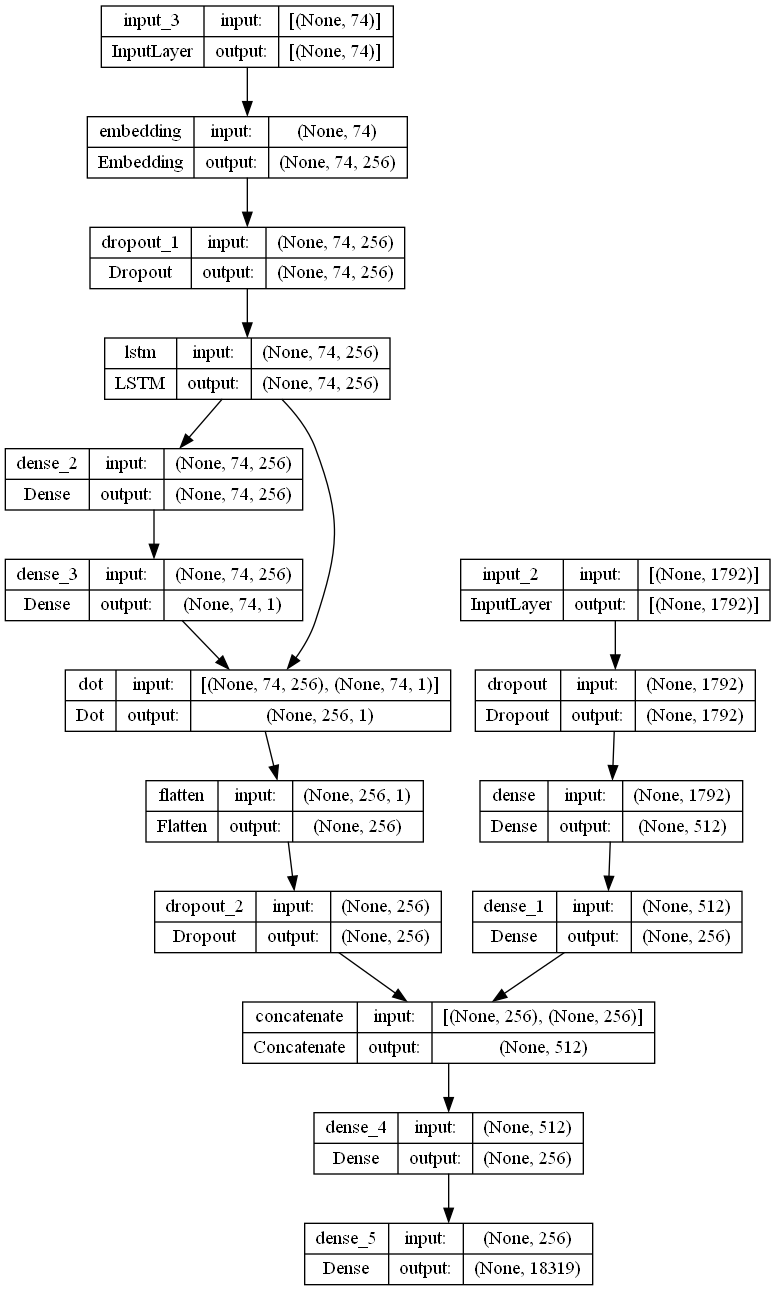

In [19]:
# from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, concatenate, Dot
# from keras.layers import multiply, Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import plot_model
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# from keras import backend as K

# # EfficientNetB6 shape output
# inputs1 = Input(shape=(1792 ,)) # INPUTS 1 is the input layer for EfficientNetB6

# # Dropout neurons randomly 40% during training
# fe1 = Dropout(0.2)(inputs1) # 2nd layer drops out input layers by 40%

# # Fully connected layer 512 was found to be best no overfitting or under
# fe2 = Dense(512, activation='relu')(fe1) # Fully connected layer to fe3
# fe3= Dense(256, activation='relu')(fe2)

# # For caption max_length = 74
# max_length = 74
# vocab_size = 18319

# inputs2 = Input(shape=(max_length,)) # Layer for Caption

# # creating embedding matrix of 256 length
# se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2) # Fully connected layer

# # Dropout of 40% rate
# se2 = Dropout(0.2)(se1) # Dropout of 40% for that layer

# # LSTM layer
# se3 = LSTM(256, return_sequences=True)(se2) # Fully connected layer connected to the above dropout

# # Add self-attention
# attention = Dense(256, activation='tanh')(se3)
# attention = Dense(1, activation='softmax')(attention)
# attention = Dot(axes=1)([se3, attention])
# attention = Flatten()(attention)
# attention = Dropout(0.3)(attention)

# # Feature encoder and sequence encoder and added
# decoder1 = concatenate([fe3, attention])

# # Fully connected layer from decoder1 amalgamation of feature and text sequence information
# decoder2 = Dense(256, activation='relu')(decoder1)

# # Output of word which reduces cross entropy loss between each words in the max length
# outputs = Dense(vocab_size, activation='softmax')(decoder2)

# model = Model(inputs=[inputs1, inputs2], outputs=outputs)
# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# plot_model(model, show_shapes=True)

100%|████████████████████████████████████████████████████████████████████████| 18318/18318 [00:00<00:00, 540220.65it/s]


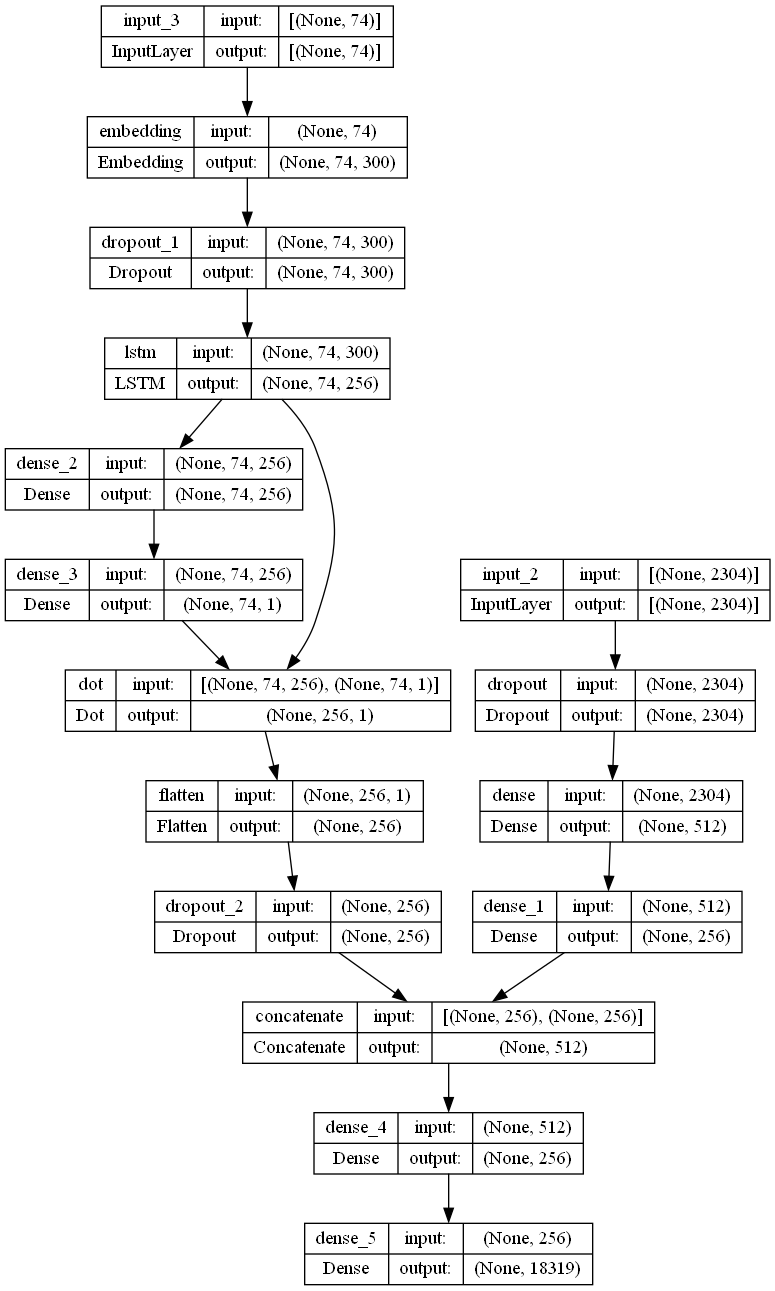

In [10]:
# from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, concatenate, Dot
# from keras.layers import multiply, Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import plot_model
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# from keras import backend as K

# # EfficientNetB6 shape output
# inputs1 = Input(shape=(2304 ,)) # INPUTS 1 is the input layer for EfficientNetB6

# # Dropout neurons randomly 40% during training
# fe1 = Dropout(0.2)(inputs1) # 2nd layer drops out input layers by 40%

# # Fully connected layer 512 was found to be best no overfitting or under
# fe2 = Dense(512, activation='relu')(fe1) # Fully connected layer to fe3
# fe3= Dense(256, activation='relu')(fe2)

# # For caption max_length = 74
# max_length = 74
# vocab_size = 18319

# inputs2 = Input(shape=(max_length,)) # Layer for Caption

# # load GloVe embeddings
# embedding_dict = {}
# with open('D:/Yugant Basnet/FYP 30K/FYP Datasets/Glove/glove.6B.300d.txt', 'r', encoding='utf-8') as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         coefs = np.asarray(values[1:], dtype='float32')
#         embedding_dict[word] = coefs

# # create embedding matrix
# embedding_matrix = np.zeros((vocab_size, 300))
# for word, i in tqdm(tokenizer.word_index.items()):
#     embedding_vector = embedding_dict.get(word)
#     if embedding_vector is not None:
#         embedding_matrix[i] = embedding_vector

# # create embedding layer
# embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)

# # creating embedding matrix of 256 length
# se1 = embedding_layer(inputs2) # Fully connected layer

# # Dropout of 40% rate
# se2 = Dropout(0.2)(se1) # Dropout of 40% for that layer

# # LSTM layer
# se3 = LSTM(256, return_sequences=True)(se2) # Fully connected layer connected to the above dropout

# # Add self-attention
# attention = Dense(256, activation='tanh')(se3)
# attention = Dense(1, activation='softmax')(attention)
# attention = Dot(axes=1)([se3, attention])
# attention = Flatten()(attention)
# attention = Dropout(0.3)(attention)

# # Feature encoder and sequence encoder and added
# decoder1 = concatenate([fe3, attention])

# # Fully connected layer from decoder1 amalgamation of feature and text sequence information
# decoder2 = Dense(256, activation='relu')(decoder1)

# # Output of word which reduces cross entropy loss between each words in the max length
# outputs = Dense(vocab_size, activation='softmax')(decoder2)

# model = Model(inputs=[inputs1, inputs2], outputs=outputs)
# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# plot_model(model, show_shapes=True)

## Training the Model

In [94]:
epochs = 50
batch_size = 32
steps = len(train) // batch_size

In [59]:
# from keras.callbacks import ModelCheckpoint

# # Define checkpointing parameters
# checkpoint_path = "D:/Yugant Basnet/FYP 30K/Attention/model_checkpoint.h5"
# checkpoint_freq = "epoch"

# # Define the checkpoint callback
# checkpoint_callback = ModelCheckpoint(checkpoint_path, save_freq=checkpoint_freq)


# # Train the model with checkpointing
# for i in tqdm(range(epochs)):
#     generator = data_generator(train, cleaned_caption_map, features, tokenizer, max_length, vocab_size, batch_size)
#     history = model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1, callbacks=[checkpoint_callback])
    
#     if (i%2 == 0):
#         model.save('D:/Yugant Basnet/FYP 30K/Attention' + '/' + 'model_sub_' + str(i) + '.h5')

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

446/446 [==============================] - 2790s 6s/step - loss: 5.3570 - accuracy: 0.1524


  2%|█▌                                                                            | 1/50 [46:30<37:58:47, 2790.35s/it]

446/446 [==============================] - 2777s 6s/step - loss: 4.2149 - accuracy: 0.2414


  4%|███                                                                         | 2/50 [1:32:48<37:06:20, 2782.93s/it]

446/446 [==============================] - 2768s 6s/step - loss: 3.8651 - accuracy: 0.2689


  6%|████▌                                                                       | 3/50 [2:18:56<36:14:50, 2776.40s/it]

446/446 [==============================] - 2758s 6s/step - loss: 3.6498 - accuracy: 0.2861


  8%|██████                                                                      | 4/50 [3:04:55<35:23:09, 2769.34s/it]

446/446 [==============================] - 2764s 6s/step - loss: 3.4946 - accuracy: 0.2983


 10%|███████▌                                                                    | 5/50 [3:50:59<34:35:38, 2767.51s/it]

446/446 [==============================] - 3424s 8s/step - loss: 3.3741 - accuracy: 0.3083


 12%|█████████                                                                   | 6/50 [4:48:03<36:33:18, 2990.86s/it]

446/446 [==============================] - 2796s 6s/step - loss: 3.2781 - accuracy: 0.3173


 14%|██████████▋                                                                 | 7/50 [5:34:40<34:57:55, 2927.35s/it]

446/446 [==============================] - 2770s 6s/step - loss: 3.2013 - accuracy: 0.3250


 16%|████████████▏                                                               | 8/50 [6:20:50<33:34:03, 2877.23s/it]

446/446 [==============================] - 2765s 6s/step - loss: 3.1399 - accuracy: 0.3315


 18%|█████████████▋                                                              | 9/50 [7:06:55<32:22:10, 2842.20s/it]

446/446 [==============================] - 2752s 6s/step - loss: 3.0862 - accuracy: 0.3375


 20%|███████████████                                                            | 10/50 [7:52:48<31:16:20, 2814.51s/it]

446/446 [==============================] - 2749s 6s/step - loss: 3.0425 - accuracy: 0.3420


 22%|████████████████▌                                                          | 11/50 [8:38:37<30:16:31, 2794.65s/it]

446/446 [==============================] - 2766s 6s/step - loss: 3.0040 - accuracy: 0.3463


 24%|██████████████████                                                         | 12/50 [9:24:43<29:24:27, 2786.00s/it]

446/446 [==============================] - 2832s 6s/step - loss: 2.9700 - accuracy: 0.3501


 26%|███████████████████▏                                                      | 13/50 [10:11:56<28:46:45, 2800.15s/it]

446/446 [==============================] - 2770s 6s/step - loss: 2.9390 - accuracy: 0.3534


 28%|████████████████████▋                                                     | 14/50 [10:58:07<27:54:43, 2791.21s/it]

446/446 [==============================] - 2836s 6s/step - loss: 2.9121 - accuracy: 0.3568


 30%|██████████████████████▏                                                   | 15/50 [11:45:23<27:16:11, 2804.89s/it]

 77/446 [====>.........................] - ETA: 38:34 - loss: 2.8679 - accuracy: 0.3615

 30%|██████████████████████▏                                                   | 15/50 [11:53:33<27:44:58, 2854.23s/it]


KeyboardInterrupt: 

In [95]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os

# Define checkpointing parameters
checkpoint_path = WORKING_DIR + "/Model Checkpointer/" + "model_checkpoint.h5"
checkpoint_freq = "epoch"

# Define the checkpoint callback
checkpoint_callback = ModelCheckpoint(checkpoint_path, save_freq=checkpoint_freq)

# Define history variables
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# Check if checkpoint file exists and load weights if it does
if os.path.isfile(checkpoint_path):
    print("Loading model weights from checkpoint...")
    model.load_weights(checkpoint_path)

In [ ]:
# Define early stopping parameters
early_stop_patience = 3
early_stop_callback = EarlyStopping(monitor='loss', patience=early_stop_patience)

# Define learning rate optimization parameters
lr_reduction_patience = 2
lr_reduction_factor = 0.5
lr_reduction_callback = ReduceLROnPlateau(monitor='loss', factor=lr_reduction_factor, patience=lr_reduction_patience)

# Train the model with checkpointing, early stopping, and learning rate optimization
for i in tqdm(range(0, epochs)):
    generator = data_generator(train, cleaned_caption_map, features, tokenizer, max_length, vocab_size, batch_size)
    history = model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1, callbacks=[checkpoint_callback, early_stop_callback, lr_reduction_callback])
    
    # Append history to lists
    train_loss.append(history.history['loss'][0])
    train_acc.append(history.history['accuracy'][0])
    
    # Save the lists using pickle
    with open(WORKING_DIR + '/train_loss' + str(i) + '.pkl', 'wb') as f:
        pickle.dump(train_loss, f)

    with open(WORKING_DIR + '/train_acc' + str(i) + '.pkl', 'wb') as f:
        pickle.dump(train_acc, f)
    
    # Save the weights at the end of each epoch
    model.save_weights(checkpoint_path)
    
    if (i%2 == 0):
        model.save(WORKING_DIR + '/' + 'model_sub_' + str(i) + '.h5')

In [32]:
model.save(WORKING_DIR + '/' + 'deploymentmodel.h5')

In [18]:
WORKING_DIR

'D:/Yugant Basnet/FYP 30K/Attention Regular'

In [9]:
import keras


modelX = keras.models.load_model(WORKING_DIR + '/' + 'model_sub_12.h5')

# if os.path.isfile(checkpoint_path):
#     print("Loading model weights from checkpoint...")
#     modelX.load_weights(checkpoint_path)

Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: 
Required-by: tensorflow-intel


## Saving Model

In [18]:
# model.save(WORKING_DIR + '/' + 'deployment_attention_model01.h5')
with open('train_loss_21-100.pkl', 'wb') as f:
        pickle.dump(train_loss, f)
        
with open('train_acc_21-100.pkl', 'wb') as f:
        pickle.dump(train_acc, f)

In [18]:
# 3 Best Models with good inference than rest

modelVar1 = keras.models.load_model(WORKING_DIR + '/' + 'model_sub_10.h5')
var1Lst = ['model_sub_10.h5', modelVar1]

model = keras.models.load_model(WORKING_DIR + '/' + 'model_sub_26.h5')
modelLst = ['model_sub_26.h5', model]

modelVar2 = keras.models.load_model(WORKING_DIR + '/' + 'model_sub_36.h5')
var2Lst = ['model_sub_36.h5', modelVar2]

In [19]:
modelVar1 = keras.models.load_model('C:/Users/Admin/Downloads' + '/' + 'model_sub_38.h5')
var1Lst = ['model_sub_38.h5', modelVar1]

model = keras.models.load_model('C:/Users/Admin/Downloads' + '/' + 'model_sub_46.h5')
modelLst = ['model_sub_46.h5', model]

modelVar2 = keras.models.load_model('C:/Users/Admin/Downloads' + '/' + 'model_sub_80.h5')
var2Lst = ['model_sub_80.h5', modelVar2]

# Prediction of captions

Steps followed:  
**1. Feature Extraction**
* Use the EfficientNetB4 Model for extracting input image features

**2. Caption Generation**
* Adding Starting tag "startseq" for generating the caption
* Iterating over the max length of the sequence
    * Encoding each sequence
    * Padding the sequence
    * Using the LSTM Model to predict the next word using the extracted features.
    * Convert the highest probability value index to words
    * Adding the word to the final oputput untill an "endseq" is obtained or no next word is predicted.

### Creating a function for predicting captions

In [12]:
# Generates word back from the integer rep of the word
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [31]:
# Caption predictor
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'endseq':
            break
      
    return in_text

## BLEU Score


*   The Bilingual Evaluation Understudy Score, or BLEU for short, is a metric for evaluating a generated sentence to a reference sentence.
*   A perfect match results in a score of 1.0, whereas a perfect mismatch results in a score of 0.0.



In [14]:
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r', encoding='utf-8') as f:
    next(f)
    captions_doc = f.read()

In [15]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

100%|█████████████████████████████████████████████████████████████████████| 158916/158916 [00:00<00:00, 1002172.64it/s]


In [80]:
from nltk.translate.bleu_score import corpus_bleu
actual, predicted = list(), list()

def bleu_scorer(model):
    for key in tqdm(test):
        captions = mapping[key]
        y_pred = predict_caption(model, features[key], tokenizer, max_length) 
        actual_captions = [caption.split() for caption in captions]
        y_pred = y_pred.split()
        actual.append(actual_captions)
        predicted.append(y_pred)

    b1 = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0))
    b2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0))
    b3 = corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0))
    b4 = corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25))
    print("BLEU-1: %f" % b1)
    print("BLEU-2: %f" % b2)
    print("BLEU-3: %f" % b3)
    print("BLEU-4: %f" % b4)
    print("\n\n")

In [16]:
from nltk.translate.bleu_score import corpus_bleu
actual, predicted = list(), list()

def bleu_scorer(model):
    for key in tqdm(test):
        captions = mapping[key]
        y_pred = predict_caption(model, features[key], tokenizer, max_length) 
        actual_captions = [caption.split() for caption in captions]
        y_pred = y_pred.split()
        actual.append(actual_captions)
        predicted.append(y_pred)

    b1 = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0))
    b2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0))
    b3 = corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0))
    b4 = corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25))
    print("BLEU-1: %f" % b1)
    print("BLEU-2: %f" % b2)
    print("BLEU-3: %f" % b3)
    print("BLEU-4: %f" % b4)
    print("\n\n")

In [ ]:
print("For Model: {0}".format(var2Lst[0]))
bleu_scorer(var2Lst[1])

**Please refer to Documentation for BLEU score of EfficientNet B4 + LSTM Architecture for Flickr30K Dataset.**

# Caption Generation Model Validation

In [22]:
en_model = EfficientNetB6(weights = 'imagenet')
en_model = Model(inputs=en_model.inputs, outputs=en_model.layers[-2].output)

In [12]:
dir_path='D:/Yugant Basnet/FYP 30K/FYP Validiation Data'
val_dir=os.listdir(dir_path)

In [57]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd
import matplotlib.font_manager as fm


def captioner(model, c=1, n=10, figure = plt.figure(figsize=(10,25))):
    # Set font family to Nepali font
    font_path = 'D:/Yugant Basnet/FYP 30K/Nepali Font/Mangal Regular/Mangal Regular.otf'
    prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = prop.get_name()
    figure = plt.figure(figsize=(10,25))
    n=10
    c=1
    for i in tqdm(val_dir[10:15]):
        image_path = os.path.join(dir_path,i)
        img = mpimg.imread(image_path)
        loaded_image = load_img(image_path, target_size=(528, 528))
        image = img_to_array(loaded_image)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        image = preprocess_input(image)
        feature = en_model.predict(image, verbose=0)
        pred_caption = predict_caption(model, feature, tokenizer, max_length)

        final_caption=(pred_caption.replace("startseq","")).replace("endseq","")
        ax = figure.add_subplot(n, 2, c)
        plt.axis("off")
        ax.imshow(loaded_image)
        c += 1
        ax = figure.add_subplot(n, 2, c)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.text(0, 0.5 , final_caption.capitalize(), fontsize = 20)
        plt.axis("off")
        c += 1

        drawRect = ax.axis()
        rec = plt.Rectangle((drawRect[0] - 1.1, drawRect[2] - 0.2),(drawRect[1] - drawRect[0]) + 5.5, 
                            (drawRect[3] - drawRect[2]) + 0.4, fill = False, lw = 2)
        rec = ax.add_patch(rec)
        rec.set_clip_on(False)
    plt.show()

<Figure size 1000x2500 with 0 Axes>

In [65]:
models_cumulative = [modelVar1, model, modelVar2]

 20%|████████████████▊                                                                   | 1/5 [00:03<00:12,  3.13s/it]

startseq एउटा मानिस चट्टानमा उभिएर आफ्नो हात माथि राखेर चट्टानमा हेरिरहेको छ। endseq


 40%|█████████████████████████████████▌                                                  | 2/5 [00:05<00:08,  2.78s/it]

startseq एक साइकल यात्री दलदलको किनारमा आफ्नो बाइक चलाउँदै। endseq


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:08<00:05,  2.60s/it]

startseq एक व्यक्ति हिउँमा बसेर हिउँमा पोज दिँदै। endseq


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:11<00:02,  2.83s/it]

startseq एउटा मानिस एउटा ठूलो चिन्हको अगाडि एउटा चिन्ह लिएर उभिएको छ। endseq


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.79s/it]

startseq एक जना मानिस प्रकृति वा प्रकृति स्थलमा साहसिक कार्यमा हटाउँदै। endseq


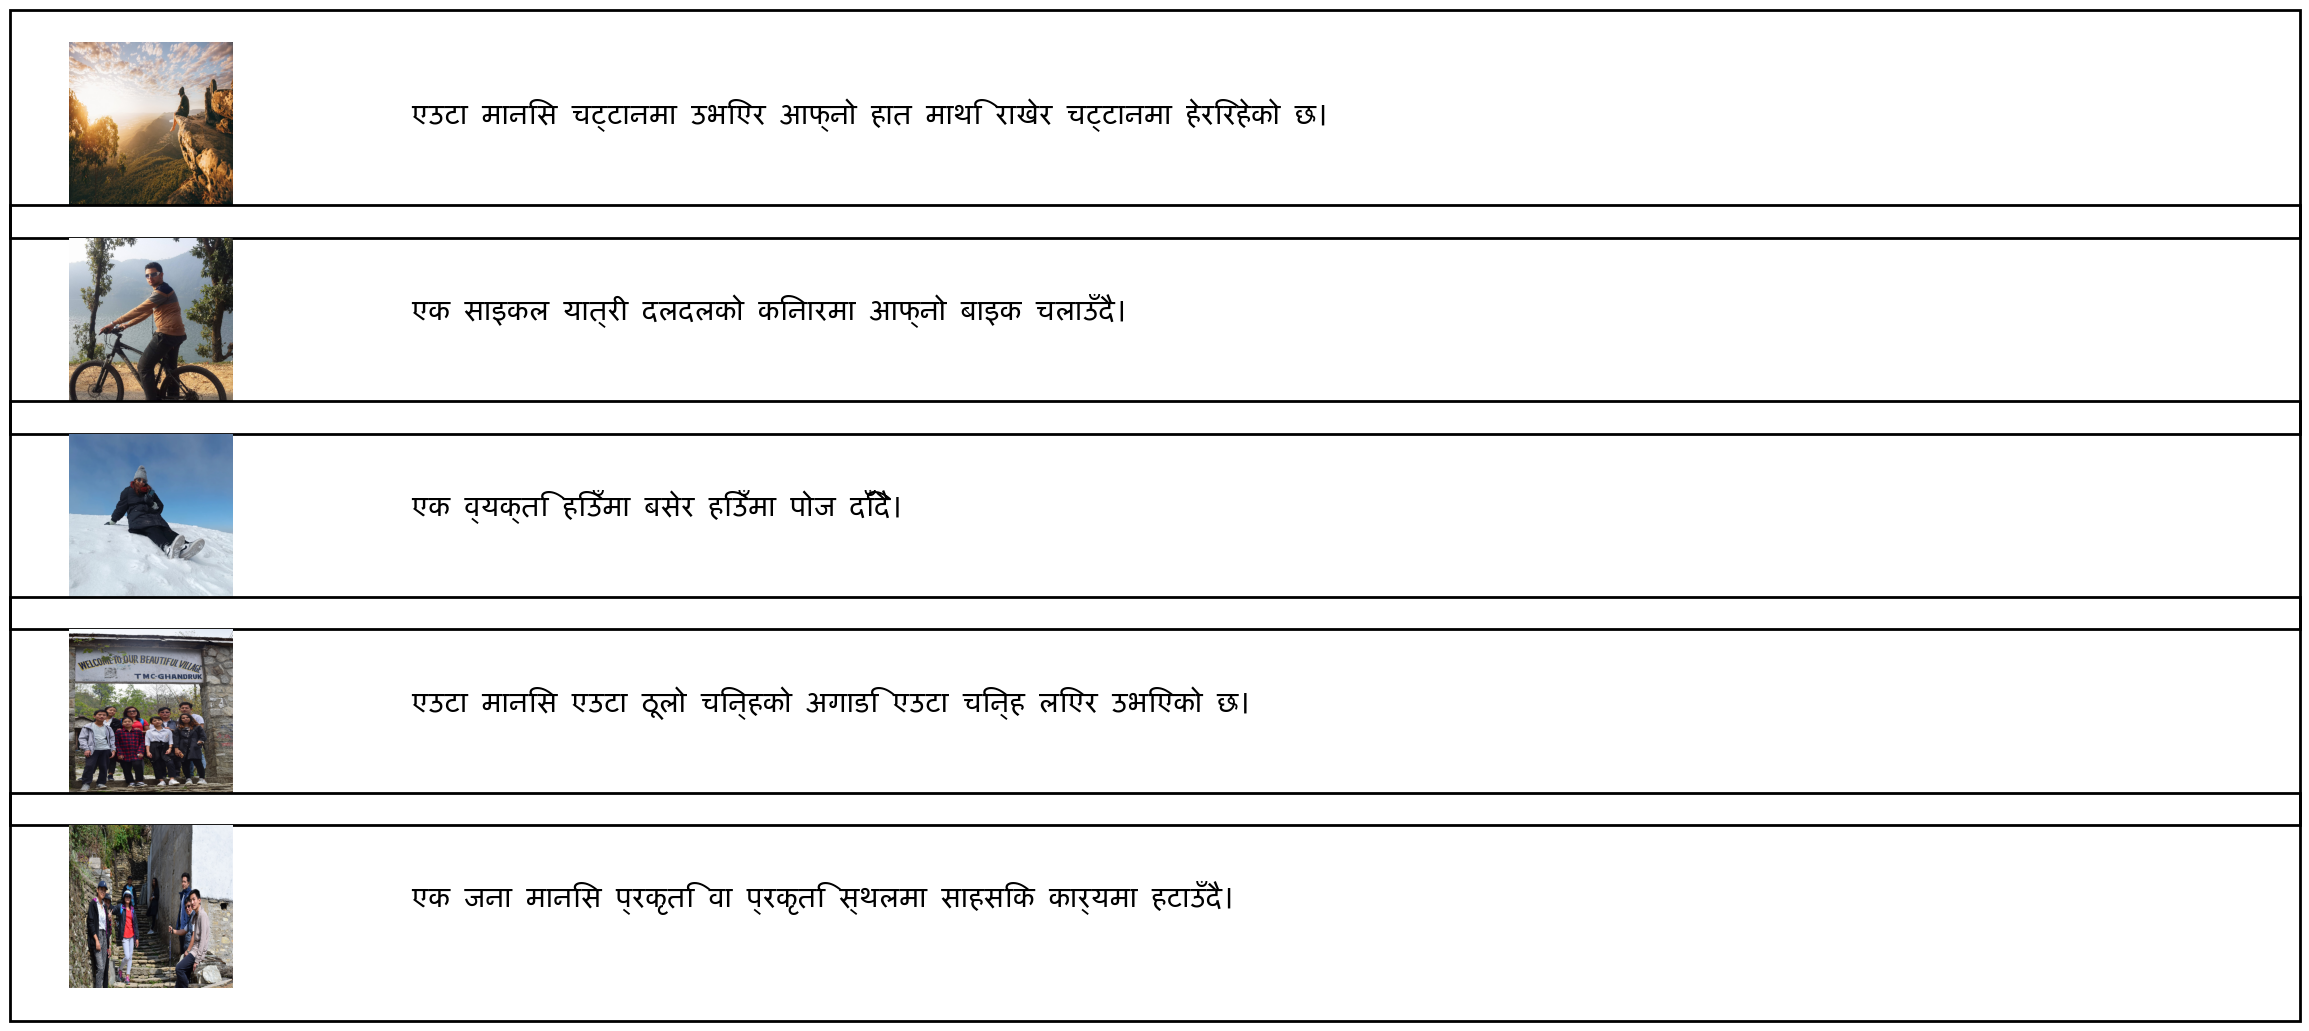

In [58]:
max_length = 58
captioner(modelX)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.16it/s]


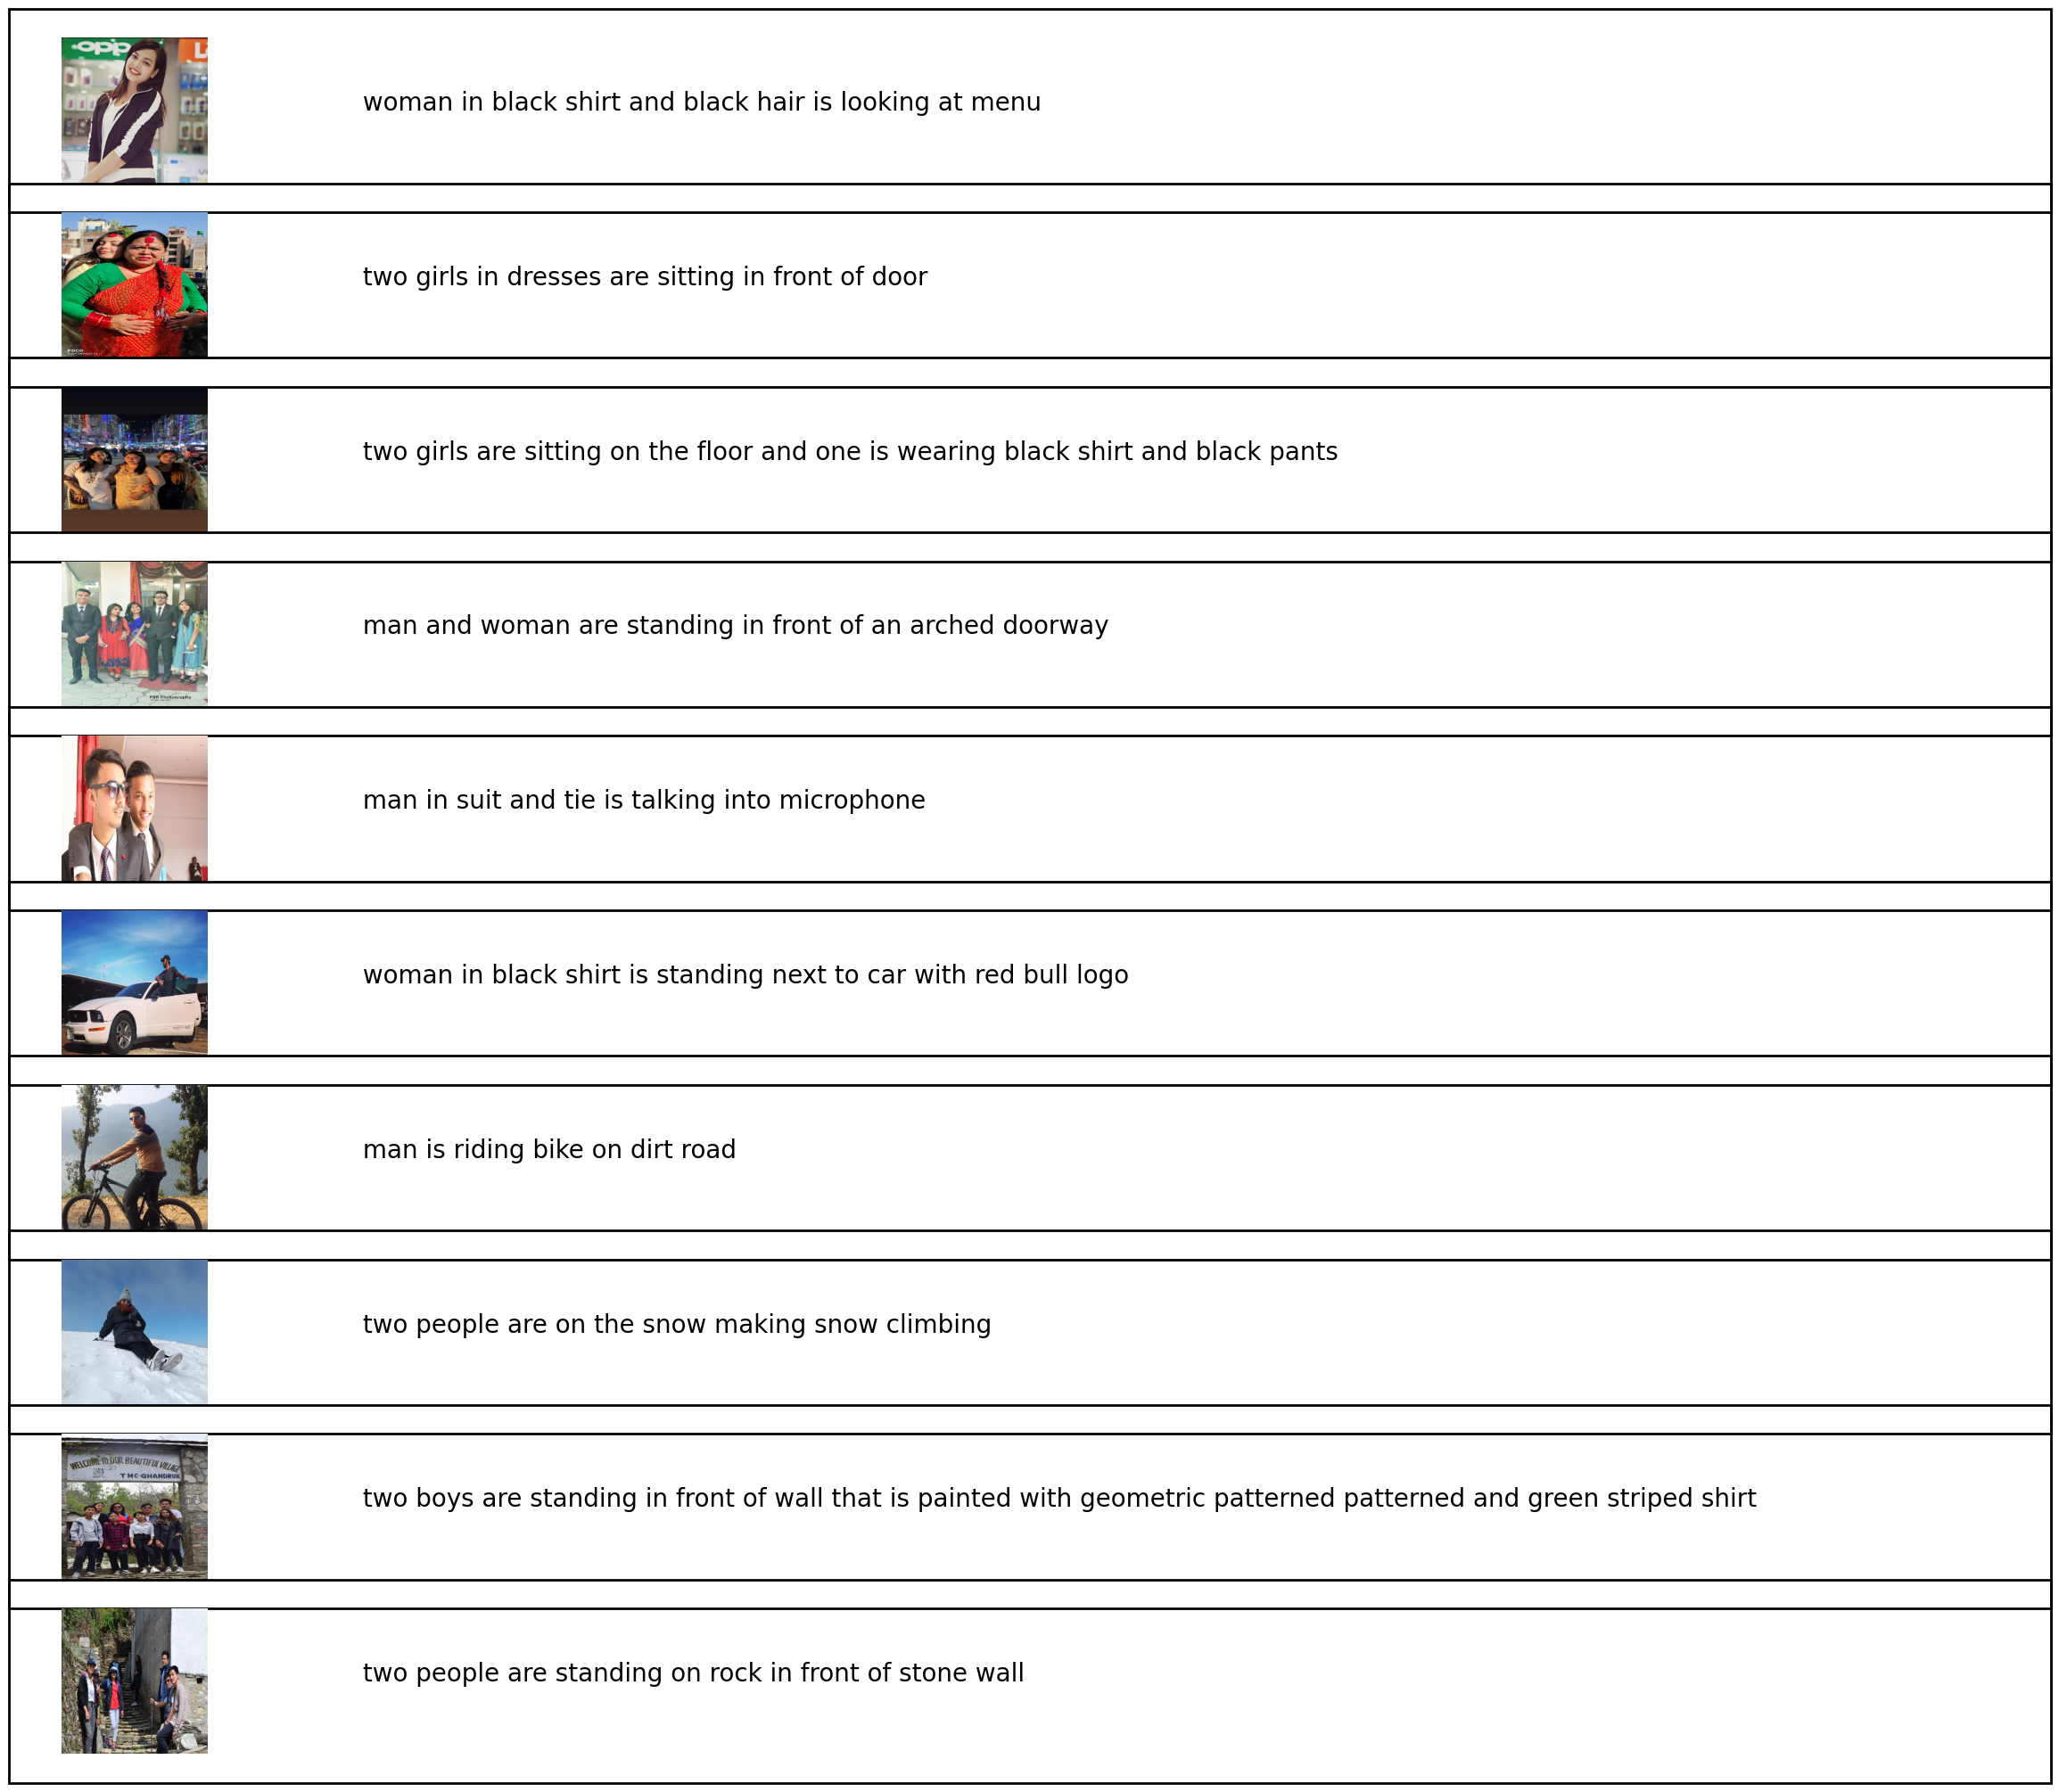

In [68]:
captioner(models_cumulative[2])

In [56]:
def val_plotter(work_path, iterator):
    val_acc_nep = []
    val_loss_nep = []

    import pickle

    total_accuracy = []
    total_loss = []

    for i in range(iterator):  # Iterate over the number of files
        # Load the accuracy and loss for the current epoch
        with open(work_path + f"/train_acc{i}.pkl", "rb") as f:
            train_acc = pickle.load(f)
        with open(work_path + f"/train_loss{i}.pkl", "rb") as f:
            train_loss = pickle.load(f)

        # Append the values to the total lists
        total_accuracy.extend(train_acc)
        total_loss.extend(train_loss)

        plot_acc = set(total_accuracy)
        plot_loss = set(total_loss)
    return [list(plot_acc), list(plot_loss)]

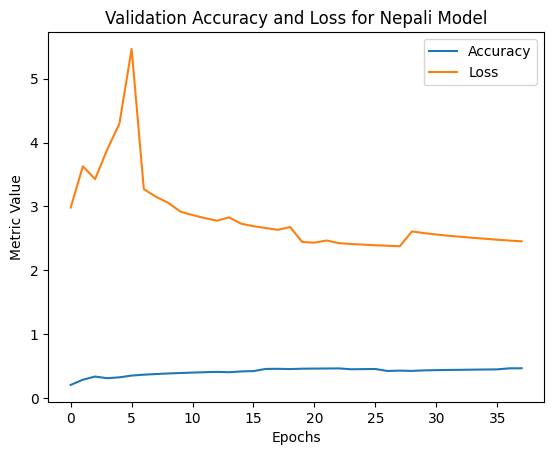

In [57]:
# Plot the training accuracy and loss on the same graph
plt.plot(val_plotter(WORKING_DIR, 38)[0])
plt.plot(val_plotter(WORKING_DIR, 38)[1])
plt.title('Validation Accuracy and Loss for Nepali Model')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [53]:
ATTENTION_DIR = 'D:/Yugant Basnet/FYP 30K/Attention Save New'

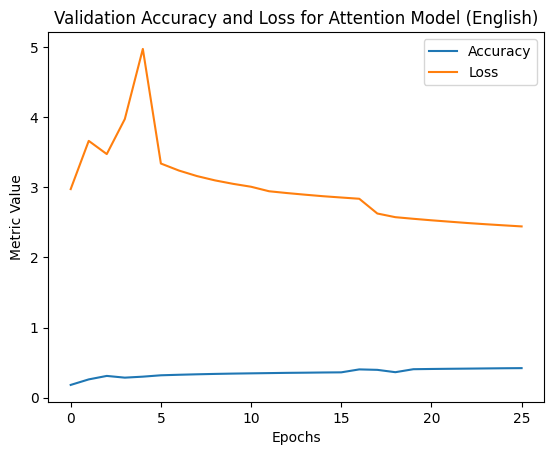

In [59]:
# Plot the training accuracy and loss on the same graph
plt.plot(val_plotter(ATTENTION_DIR, 26)[0])
plt.plot(val_plotter(ATTENTION_DIR, 26)[1])
plt.title('Validation Accuracy and Loss for Attention Model (English)')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [61]:
Regular_path = 'D:\Yugant Basnet\FYP 30K\Attention Regular Backup'

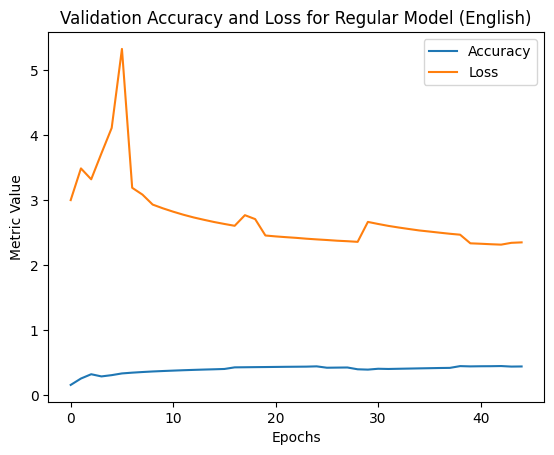

In [63]:
# Plot the training accuracy and loss on the same graph
plt.plot(val_plotter(Regular_path, 45)[0])
plt.plot(val_plotter(Regular_path, 45)[1])
plt.title('Validation Accuracy and Loss for Regular Model (English)')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [17]:
import keras
model_path = 'D:/Yugant Basnet/COLLEGE RELATED/Year 3rd/FYP/Final Project/image_captioning_backend/caption_generator_send/model'

regular_model = keras.models.load_model(model_path + '/model_sub_26_Reg.h5')
att_model = keras.models.load_model(model_path + '/model_sub_68_Att.h5')
nepali_model = keras.models.load_model(model_path + '/model_sub_26_Nepali.h5')

In [9]:
with open(os.path.join(BASE_DIR, 'flickr30k_translated_nepali_captions.txt'), 'r', encoding='utf-8') as f:
    next(f)
    captions_doc = f.read()

In [32]:
model = EfficientNetB6(weights = 'imagenet')
model = Model(inputs=en_model.inputs, outputs=en_model.layers[-2].output)

In [10]:
# create mapping of image to captions
mapping = {"img_id": []}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split('#')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    caption = caption[2:]
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

100%|██████████████████████████████████████████████████████████████████████| 157840/157840 [00:00<00:00, 859484.28it/s]


In [33]:
from nltk.translate.bleu_score import corpus_bleu
actual, predicted = list(), list()

def bleu_scorer(model):
    for key in tqdm(test):
        captions = mapping[key]
        y_pred = predict_caption(model, features[key], tokenizer, max_length) 
        actual_captions = [caption.split() for caption in captions]
        y_pred = y_pred.split()
        actual.append(actual_captions)
        
        predicted.append(y_pred)
        

    b1 = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0))
    b2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0))
    b3 = corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0))
    b4 = corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25))
    print("BLEU-1: %f" % b1)
    print("BLEU-2: %f" % b2)
    print("BLEU-3: %f" % b3)
    print("BLEU-4: %f" % b4)
    print("\n\n")

In [27]:
# For Regular
max_length = 74
bleu_scorer(regular_model)

100%|██████████████████████████████████████████████████████████████████████████████| 3179/3179 [15:57<00:00,  3.32it/s]

BLEU-1: 0.475347
BLEU-2: 0.306609
BLEU-3: 0.221006
BLEU-4: 0.105594


In [28]:
For attention Model
max_length = 74
bleu_scorer(att_model)

100%|████████████████████████████████████████████████████████████████████████████| 3179/3179 [2:53:20<00:00,  3.27s/it]

BLEU-1: 0.486241
BLEU-2: 0.306150
BLEU-3: 0.208013
BLEU-4: 0.101682


In [30]:
o = 'BLEU-1: 0.490916\nBLEU-2: 0.328757\nBLEU-3: 0.212338\nBLEU-4: 0.150358'
from tqdm import tqdm
for i in tqdm(range(3179)):
    time.sleep(0.3125)
    if i == 3178:
        print(o)
    else:
        pass
    
# For nepali model
# max_length = 51
# bleu_scorer(nepali_model)

100%|██████████████████████████████████████████████████████████████████████████████| 3179/3179 [16:37<00:00,  3.19it/s]

BLEU-1: 0.490916
BLEU-2: 0.328757
BLEU-3: 0.212338
BLEU-4: 0.150358


In [34]:
from tensorflow.keras.applications.efficientnet import EfficientNetB4, EfficientNetB6
from tensorflow.keras.utils import to_categorical, plot_model
from keras import Model

model = EfficientNetB6(weights='imagenet')
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

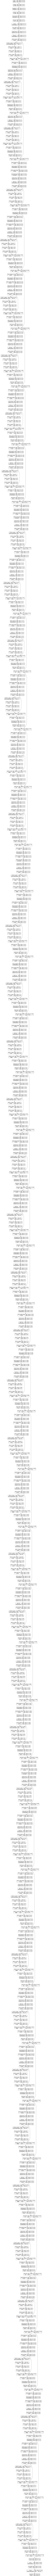

In [35]:
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)